# ReAct Prompt Engineering
* Notebook by Adam Lang
* Date: 9/27/2024

# Overview
* We will go over ReAct prompt engineering.

# What is ReAct Prompt engineering
1. **Integrated reasoning** - blends internal reasoning and actionable steps improving task execution.
2. **Strategic Interaction** - plans and adapts actions including engaging with external information sources like websites.
   * external info such as: wikipedia, google
3. **Human-like Reasoning** - aims for a natural problem-solving approach by preventing guesswork and encouraging logical progression.
* Example of how this works:
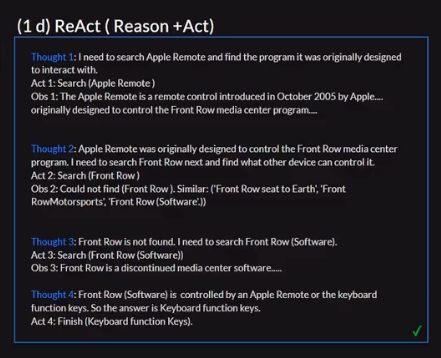

* The general idea is that the LLM goes through strategic step by step reasoning and actions to find an answer to make sure that it has exhausted all resources to find the correct answer.

## Pros of ReAct Prompting
1. Merges thought with action for dynamic and responsive planning.
2. Transparent process in decision-making buils user confidence.
3. Harnesses and utilizes external data like Wikipedia to enhnace decision making and results.

## Cons of ReAct Prompting
1. Often challenged by complex tasks with numerous options due to cognitive load limitations of LLMs.
2. May enter feedback loops reiterating through thoughts and actions without progressing forward to the end result or answer.
3. May find too many ways to navigate tasks and too many ways to answer a prompt.

# Implementing ReAct Prompting

In [12]:
!pip install langchain-openai langchain langchain-community wikipedia

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11679 sha256=071256c26fa9903726d62f7e9a8328af3a60a4ea20cc69919c52249bdfa3e6ec
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


In [13]:
## load modules and libraries
import os

## langchain functionality
from langchain_openai import ChatOpenAI
from langchain.callbacks import StdOutCallbackHandler ## stnd output callbacks
from langchain.agents import initialize_agent, AgentType, load_tools ## agents + tools for langchain

In [8]:
## ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Setting OpenAI API Key

In [9]:
from getpass import getpass

OPENAI_KEY = getpass('Enter your openai key here: ')

Enter your openai key here: ··········


In [10]:
## setup open ai environment
os.environ['OPENAI_API_KEY'] = OPENAI_KEY

## Implementing ReAct Agents
* LangChain has an agent framework that implements ReAct.
* Here we do the following:
1. Instantiate an LLM (`gpt-4-turbo`)
2. Tools --> create 2 tools for the LLM to use in reasoning processes:
  * wikipedia
  * llm-math for math calculations

In [14]:
## create instance of ChatOpenAI
llm = ChatOpenAI(model='gpt-4-turbo')

## load tools including wikipedia and llm-math
tools = load_tools(['wikipedia','llm-math'], llm=llm)

### Initializing an Agent
* use loaded tools
* use ChatOpenAI instance
* Set agent to `ZERO_SHOT_REACT_DESCRIPTION` for zero shot learning.
* Enable intermediate steps for debugging or analysis purposes.
* Activate verbose mode for detailed logging during initialization of agent.

In [15]:
## init agent
agent = initialize_agent(
    tools=tools,
    llm=llm,
    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    return_intermediate_steps=True,
    verbose=True
)

In [19]:
## query to LLM
question = "How many NBA championships have the Boston Celtics won? And return the output multipled by 2."

In [20]:
## create instance of StdOutCallbackHandler for managing output callbacks
handler = StdOutCallbackHandler()

## process question through initialized agent
## utilize StdOutCallbackHandler for callback mgmt
## input passed as dict with "input" key containing question
response = agent(
    {"input": question},
    callbacks=[handler]
)



> Entering new AgentExecutor chain...


> Entering new LLMChain chain...
Prompt after formatting:
Answer the following questions as best you can. You have access to the following tools:

wikipedia - A wrapper around Wikipedia. Useful for when you need to answer general questions about people, places, companies, facts, historical events, or other subjects. Input should be a search query.
Calculator(*args: Any, callbacks: Union[list[langchain_core.callbacks.base.BaseCallbackHandler], langchain_core.callbacks.base.BaseCallbackManager, NoneType] = None, tags: Optional[List[str]] = None, metadata: Optional[Dict[str, Any]] = None, **kwargs: Any) -> Any - Useful for when you need to answer questions about math.

Use the following format:

Question: the input question you must answer
Thought: you should always think about what to do
Action: the action to take, should be one of [wikipedia, Calculator]
Action Input: the input to the action
Observation: the result of the action
... (this Though

# Additional Advanced Prompt Techniques

## 1. Algorithm of Thought (AoT)
* empowers LLMs with step by step problem solving techniques.
* Uses the following:
   * a) Guided Exploration - streamlines discovery of solutions with minimum queries.
   * b) Detailed Roadmap - offers comprehensive guide for traversing through problem space.
   * c) Efficient Problem-solving - Boasts a sophisticated search strategy that resolves queries more efficiently than CoT.
   * **The main advantage here is AoT guides the LLM with IN-CONTEXT examples.***

* Cons of AoT prompting:
  * demands higher computational power due to multiple idea streams.
  * despite reduced query count, still consumes more resources than basic methods.
  * optimized for high-end models like GPT-4 potentially costlier with lower-tier models.

## 2. Skeleton of Thoughts (SoT)
* outlines answers first (outline is the same as a "skeleton"), and then fills in details in parallel speeding up the LLM response.
* This approach is modeled after how humans think and take notes: we often make "outlines" before coming to a conclusion.

### SoT - how it works
* This has 2 main stages:
1. **Two-phase efficiency**
  * begins with structuring an answer skeleton, then expands points in tandem for rapid completion.
2. **Parallel Processing**
  * enhances speed by detailing all parts of the outline at once, streamlining the thinking process.
* Below we see the increased efficiency of this method and why it is faster.
  * 1) Skeleton stage - outline thoughts
  * 2) Point expanding stage
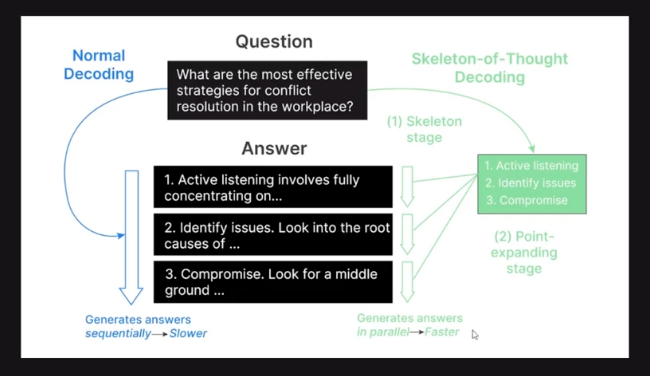



### Skeleton of Thought Prompt Template

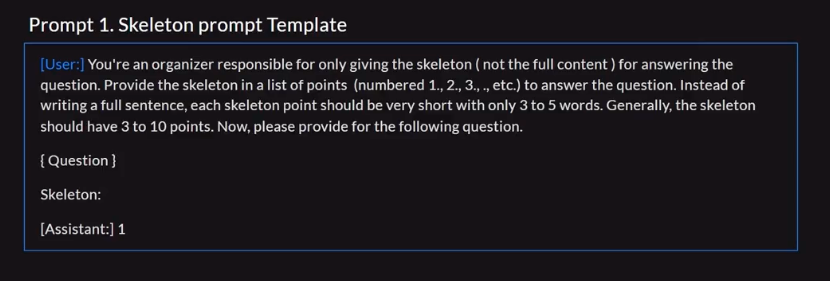

* Example: If question was "how do you bake a cake"
  * Skeleton would be to outline the steps:
    * 1) Decided recipe
    * 2) Get ingredients
    * 3) ...etc...
* The actual answer itself is generated in Prompt Template #2 which is the "Point-Expanding prompt template"

### Cons of SoT Prompting
* might not understand how to link answer parts, leading to less coherent responses.
* with pay-per-word services, outlining process could increase costs.
* speed benefits vary with prompt and model, which could affect practicality.